# Data Exploration through textual analytics

1. distribution of lengths of titles.
2. Word clouds for different categories 
3. Ngram Analysis for different categories

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amruthakaruturi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('datasets/Dataset_10k.csv')
df.head()

Unnamed: 0        date                                              title  \
0           0  2024-10-14  will.i.am and Fyilicia on the AI revolution, i...   
1           1  2024-02-21  Intel Launches World’s First Systems Foundry D...   
2           2  2024-02-05     The Unique Challenges of Selling Enterprise AI   
3           3  2024-08-28  Contentious California AI bill passes legislat...   
4           4  2024-10-15  Exploring Genius, Creation, and Humanity in th...   

                                           source  number_of_characters_title  \
0                                Evening Standard                         122   
1  Investor Relations :: Intel Corporation (INTC)                         117   
2                                          Emerge                          54   
3                                         Reuters                          88   
4                          University of Aberdeen                          82   

   number_of_words_title day_of_week     month  year  quarter  is_weekend  \
0                     20      Monday   October  2024        4       False   
1                     18   Wednesday  February  2024        1       False   
2                      9      Monday  February  2024        1       False   
3                     11   Wednesday    August  2024        3       False   
4                     14     Tuesday   October  2024        4       False   

  category  
0    Other  
1    Other  
2   Career  
3    Other  
4    Other

<Axes: xlabel='number_of_characters_title', ylabel='Count'>

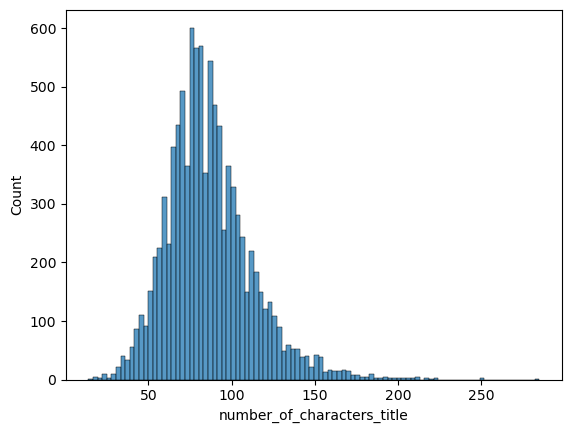

In [3]:
sns.histplot(data=df,x='number_of_characters_title')

<Axes: xlabel='number_of_words_title', ylabel='Count'>

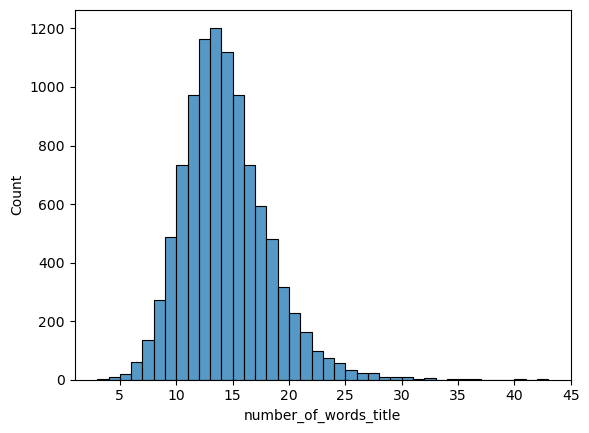

In [4]:
sns.histplot(data=df, x='number_of_words_title',binwidth=1)

**Observations:**
The to no.of words in a title on an average seem of 13.

In [2]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    #df['title3'] = df['title1'].apply(lambda x: re.sub(r'(?i)\s*artificial\s+intelligence\s*', ' ai ', x))   # 
    #df['title5'] = df['title'].apply(lambda x: re.sub(r'A\.I\.*', ' ai ', x)) 
    #df['title3'] = df['title3'].apply(lambda x: x.strip())
    token1 = [re.sub(r'[^a-z]',' ', token) for token in tokens]
    token1 = [token for token in token1 if token]
    text = ' '.join(token1)
    return text

In [5]:
df['title1']=df['title'].apply(preprocess)

## World Clouds

Here we explored what frequent occuring words present in the headlines of the given different categories

In [5]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word Cloud for title')

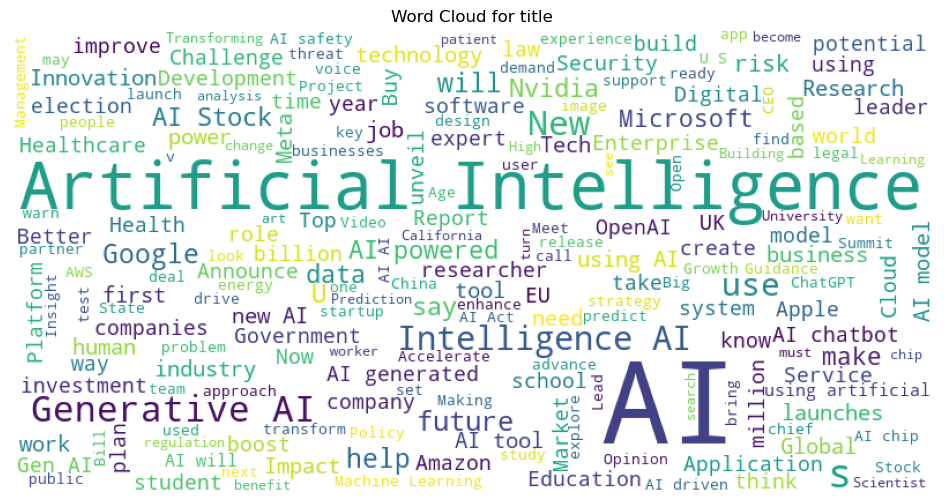

In [74]:
title_text = ' '.join(df['title'].tolist())
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word Cloud for title')

Text(0.5, 1.0, 'Word Cloud for Career')

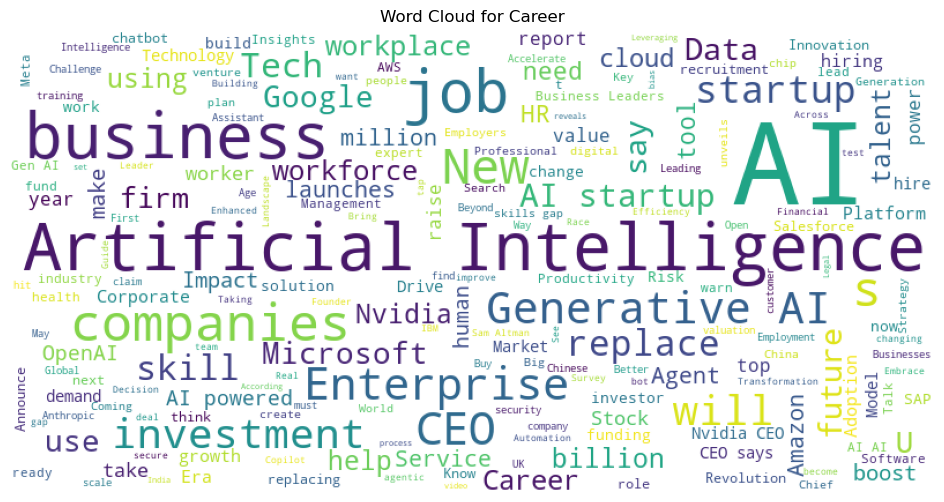

In [7]:
df1 = df[df['category']=='Career']
title_text = ' '.join(df1['title'].tolist())
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word Cloud for Career')

Text(0.5, 1.0, 'Word Cloud for Society')

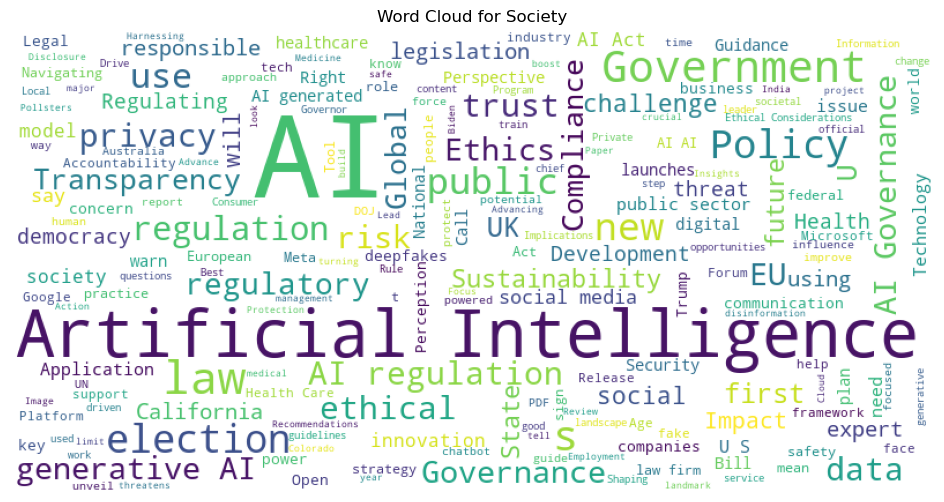

In [9]:
df1 = df[df['category']=='Society']
title_text = ' '.join(df1['title'].tolist())
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word Cloud for Society')

Text(0.5, 1.0, 'Word Cloud for Education')

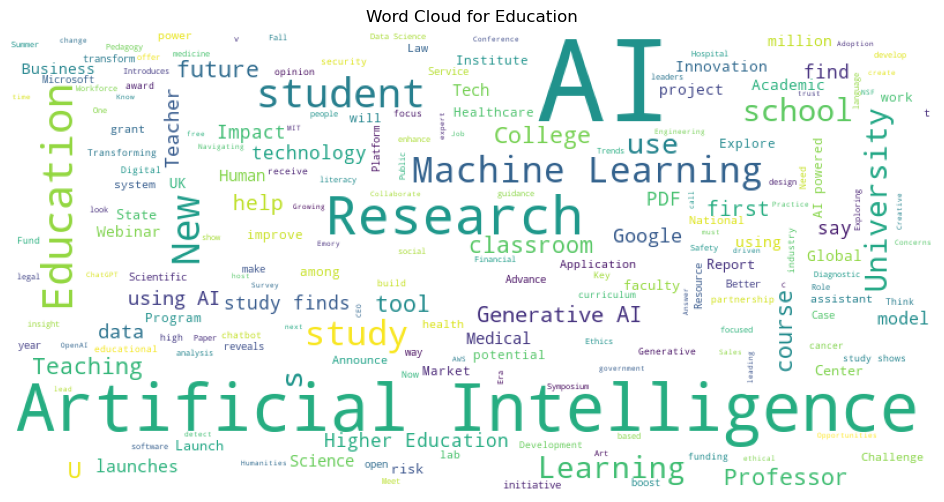

In [10]:
df1 = df[df['category']=='Education']
title_text = ' '.join(df1['title'].tolist())
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word Cloud for Education')

## N-gram Analysis
Here we explored what frequent occuring texts present in the headlines of the given different categories by using uni, bi, tri-grams to get context of what each category means

### Data preprocessing

In [6]:
stop_words = set(stopwords.words('english'))

In [86]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
def remove_stop_words(text,stop_words):
    tl = text.split()
    l=[]
    for word in tl:
        if word not in stop_words:
            l.append(word)
    text = ' '.join(l)
    return text

In [8]:
# removing python stop words
df['title1']=df['title1'].apply(lambda x: remove_stop_words(x,stop_words))
df.head()

Unnamed: 0        date                                              title  \
0           0  2024-10-14  will.i.am and Fyilicia on the AI revolution, i...   
1           1  2024-02-21  Intel Launches World’s First Systems Foundry D...   
2           2  2024-02-05     The Unique Challenges of Selling Enterprise AI   
3           3  2024-08-28  Contentious California AI bill passes legislat...   
4           4  2024-10-15  Exploring Genius, Creation, and Humanity in th...   

                                           source  number_of_characters_title  \
0                                Evening Standard                         122   
1  Investor Relations :: Intel Corporation (INTC)                         117   
2                                          Emerge                          54   
3                                         Reuters                          88   
4                          University of Aberdeen                          82   

   number_of_words_title day_of_week     month  year  quarter  is_weekend  \
0                     20      Monday   October  2024        4       False   
1                     18   Wednesday  February  2024        1       False   
2                      9      Monday  February  2024        1       False   
3                     11   Wednesday    August  2024        3       False   
4                     14     Tuesday   October  2024        4       False   

  category                                             title1  
0    Other  fyilicia ai revolution inclusivity voice uk te...  
1    Other  intel launches world first systems foundry des...  
2   Career            unique challenges selling enterprise ai  
3    Other  contentious california ai bill passes legislat...  
4    Other          exploring genius creation humanity age ai

In [9]:
stop_words1 = stop_words.copy()
stop_words1.update(['ai','artificial','intelligence'])
# removing custom stop words
df['title2']=df['title1'].apply(lambda x: remove_stop_words(x,stop_words1))
df.head()

Unnamed: 0        date                                              title  \
0           0  2024-10-14  will.i.am and Fyilicia on the AI revolution, i...   
1           1  2024-02-21  Intel Launches World’s First Systems Foundry D...   
2           2  2024-02-05     The Unique Challenges of Selling Enterprise AI   
3           3  2024-08-28  Contentious California AI bill passes legislat...   
4           4  2024-10-15  Exploring Genius, Creation, and Humanity in th...   

                                           source  number_of_characters_title  \
0                                Evening Standard                         122   
1  Investor Relations :: Intel Corporation (INTC)                         117   
2                                          Emerge                          54   
3                                         Reuters                          88   
4                          University of Aberdeen                          82   

   number_of_words_title day_of_week     month  year  quarter  is_weekend  \
0                     20      Monday   October  2024        4       False   
1                     18   Wednesday  February  2024        1       False   
2                      9      Monday  February  2024        1       False   
3                     11   Wednesday    August  2024        3       False   
4                     14     Tuesday   October  2024        4       False   

  category                                             title1  \
0    Other  fyilicia ai revolution inclusivity voice uk te...   
1    Other  intel launches world first systems foundry des...   
2   Career            unique challenges selling enterprise ai   
3    Other  contentious california ai bill passes legislat...   
4    Other          exploring genius creation humanity age ai   

                                              title2  
0  fyilicia revolution inclusivity voice uk tech ...  
1  intel launches world first systems foundry des...  
2               unique challenges selling enterprise  
3  contentious california bill passes legislature...  
4             exploring genius creation humanity age

In [10]:
# changing artificial intelligence to ai
df['title3'] = df['title1'].apply(lambda x: re.sub(r'(?i)\s*artificial\s+intelligence\s*', ' ai ', x))
df['title3'] = df['title3'].apply(lambda x: x.strip())


In [11]:
# removing consecutive ai terms
df['title4']=df['title3'].apply(lambda x:  re.sub(r'(ai\s+)+', 'ai ', x))
df['title4'] = df['title4'].apply(lambda x: x.strip())

In [12]:
def generate_bar_graphs1(df, title,n=2, top_k=20,n1=1):
    #tokens = ' '.join(df[title].tolist()).split()
    tokens = ' '.join(df[title].tolist())
    #text = ' '.join([word for word in df['title1'].split().sum() if word.lower() not in stop_words])
    # Generate n-grams
    tokens = re.sub(r'(ai\s+)+', 'ai ', tokens)
    tokens = tokens.split()
    ng= list(ngrams(tokens, n))
    # Join n-grams into single strings
    text_ng = [' '.join(gram) for gram in ng]
    # Count frequency of each n-gram
    ng_count = Counter(text_ng)
    # Select top-k most common n-grams
    n2=top_k*(n1-1) # start index
    k = top_k*n1 # end index
    ng_common = ng_count.most_common(k)
    ng_common = ng_common[n2:k]
    plt.figure(figsize=(12, 4))
    bars = plt.bar(
        [item[0] for item in ng_common],  # x-axis: n-grams
        [item[1] for item in ng_common],  # y-axis: counts
        color='skyblue')
    #plt.bar([item[0] for item in ng_common], [item[1] for item in ng_common], color='skyblue')
    # Add count values on top of each bar (value on the y-axis)
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar (frequency)
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position of the text (center of the bar)
            height,                             # Y position of the text (top of the bar)
            f'{int(height)}',                   # Text to display (convert to integer)
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize= 8                          # Font size of the text
        )
    plt.xlabel('Frequency')
    plt.title(f'Top {top_k} {n}-grams :list {n1}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [300]:
df['title5'] = df['title'].apply(lambda x: re.sub(r'A\.I\.*', ' ai ', x)) 
df1 = df[df['title4'].apply(lambda x: 'ai' not in x.split())]
#x=31
#df1['title'].iloc[x],df1['title4'].iloc[x]



In [308]:
df1['title5'] = df1['title'].apply(lambda x: re.sub(r'A\.I\.*', ' ai ', x)) 
df1['title5']= df1['title5'].apply(preprocess)
df1['title5']= df1['title5'].apply(lambda x: remove_stop_words(x,stop_words))
df1.head()

/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_34730/1135737227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['title5'] = df1['title'].apply(lambda x: re.sub(r'A\.I\.*', ' ai ', x))
/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_34730/1135737227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['title5']= df1['title5'].apply(preprocess)
/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_34730/1135737227.py:3: SettingWithCopyWarning: 
A value is trying to be se

Unnamed: 0        date  \
37           37  2024-03-28   
78           78  2024-08-12   
185         185  2024-08-12   
338         338  2024-03-13   
371         371  2024-11-01   

                                                 title  \
37        Opinion | How A.I. Chatbots Become Political   
78   Piecing Together an Ancient Epic Was Slow Work...   
185                                            Comment   
338                                   Course Spotlight   
371            David Salle’s Ghost in the A.I. Machine   

                                                source  \
37                                  The New York Times   
78                                  The New York Times   
185                                     Inside Housing   
338  The London School of Economics and Political S...   
371                                 The New York Times   

     number_of_characters_title  number_of_words_title day_of_week     month  \
37                           65                     12    Thursday     March   
78                           93                     17      Monday    August   
185                          74                     11      Monday    August   
338                         121                     20   Wednesday     March   
371                          60                     12      Friday  November   

     year  quarter  is_weekend   category  \
37   2024        1       False      Other   
78   2024        3       False      Other   
185  2024        3       False      Other   
338  2024        1       False  Education   
371  2024        4       False      Other   

                                                title1  \
37                   opinion chatbots become political   
78   piecing together ancient epic slow work got in...   
185                                            comment   
338                                   course spotlight   
371                          david salle ghost machine   

                                                title2  \
37                   opinion chatbots become political   
78   piecing together ancient epic slow work got in...   
185                                            comment   
338                                   course spotlight   
371                          david salle ghost machine   

                                                title3  \
37                   opinion chatbots become political   
78   piecing together ancient epic slow work got in...   
185                                            comment   
338                                   course spotlight   
371                          david salle ghost machine   

                                                title4  \
37                   opinion chatbots become political   
78   piecing together ancient epic slow work got in...   
185                                            comment   
338                                   course spotlight   
371                          david salle ghost machine   

                                                title5  
37                opinion ai chatbots become political  
78   piecing together ancient epic slow work ai got...  
185                                            comment  
338                                   course spotlight  
371                       david salle ghost ai machine

In [311]:
df1[df1['title5'].apply(lambda x: 'ai' not in x.split())].shape

(59, 17)

### All data

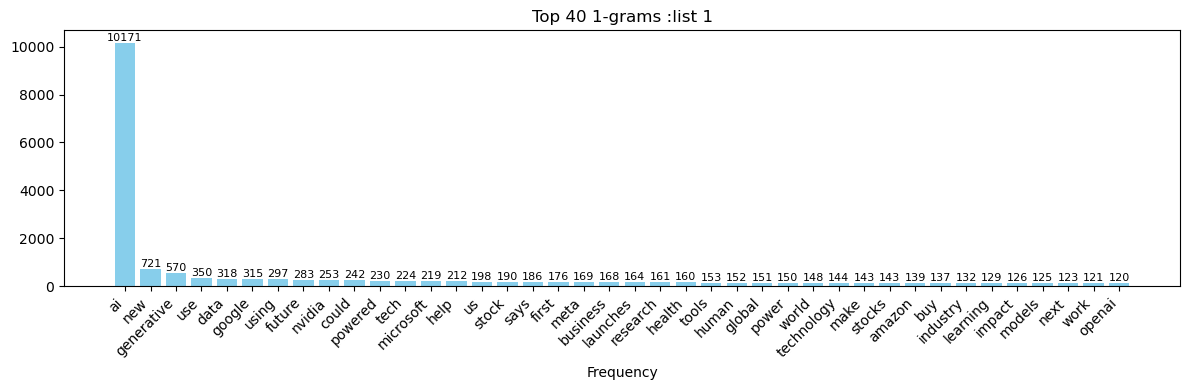

In [334]:
generate_bar_graphs1(df,'title4',1,40,1)

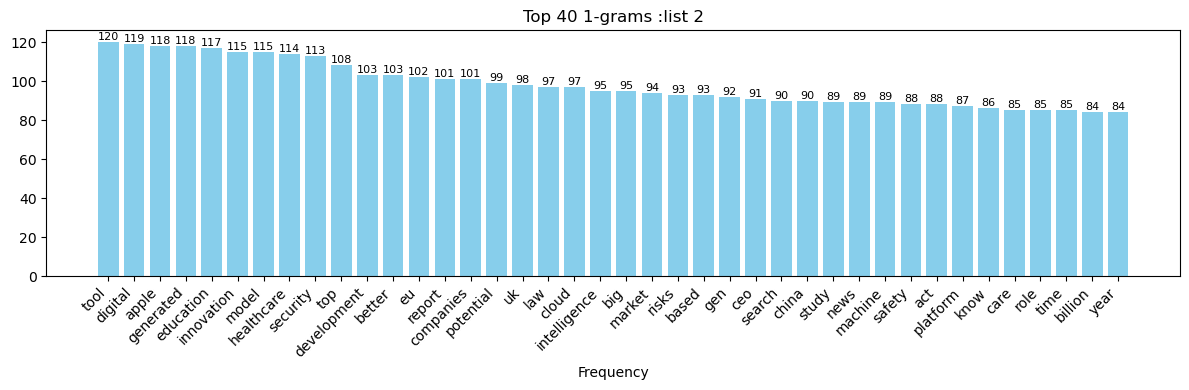

In [335]:
generate_bar_graphs1(df,'title4',1,40,2)

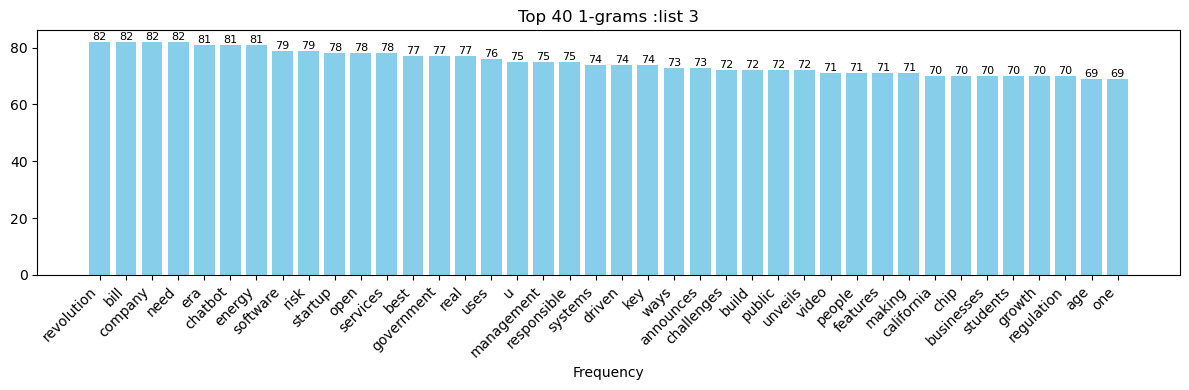

In [336]:
generate_bar_graphs1(df,'title4',1,40,3)

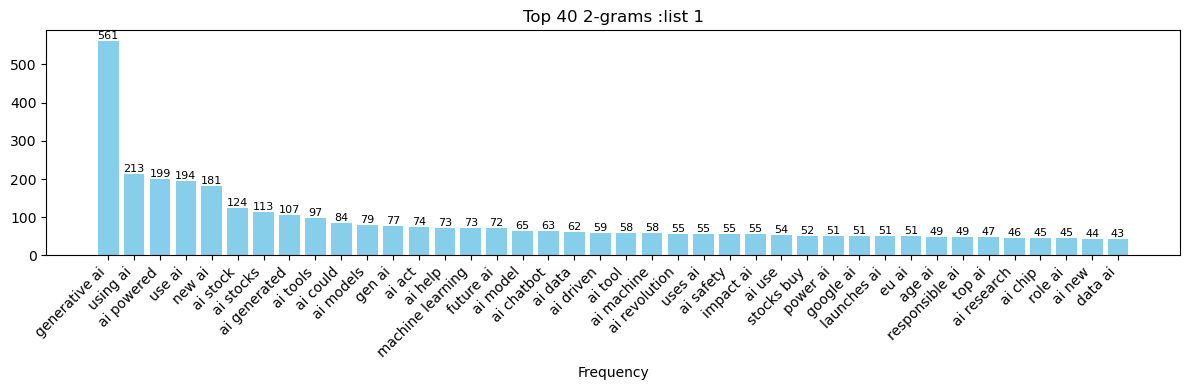

In [337]:
generate_bar_graphs1(df,'title4',2,40,1)

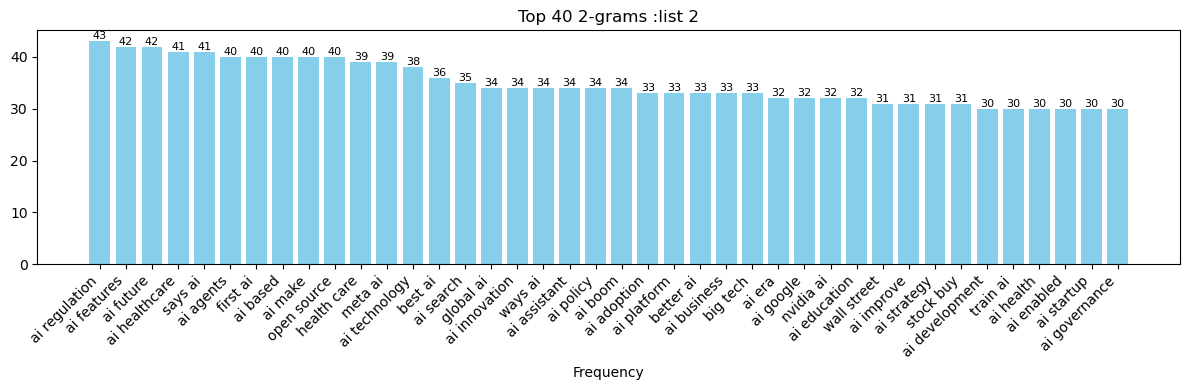

In [338]:
generate_bar_graphs1(df,'title4',2,40,2)

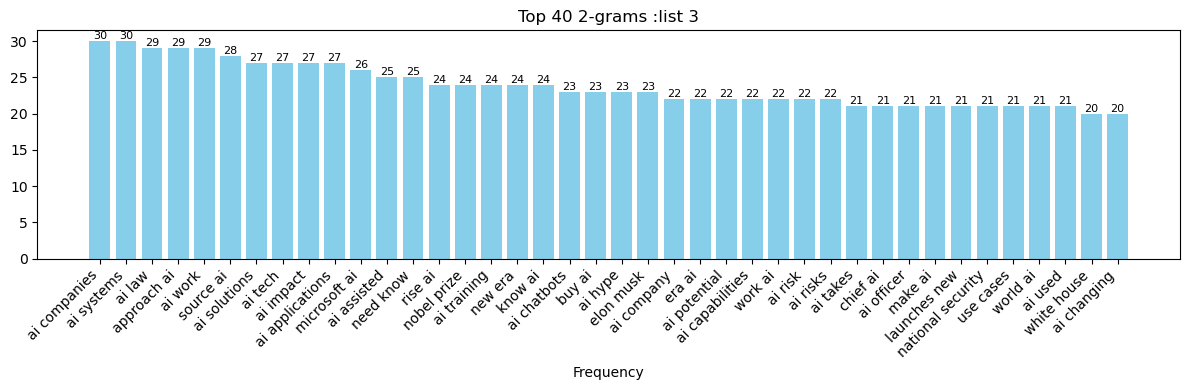

In [339]:
generate_bar_graphs1(df,'title4',2,40,3)

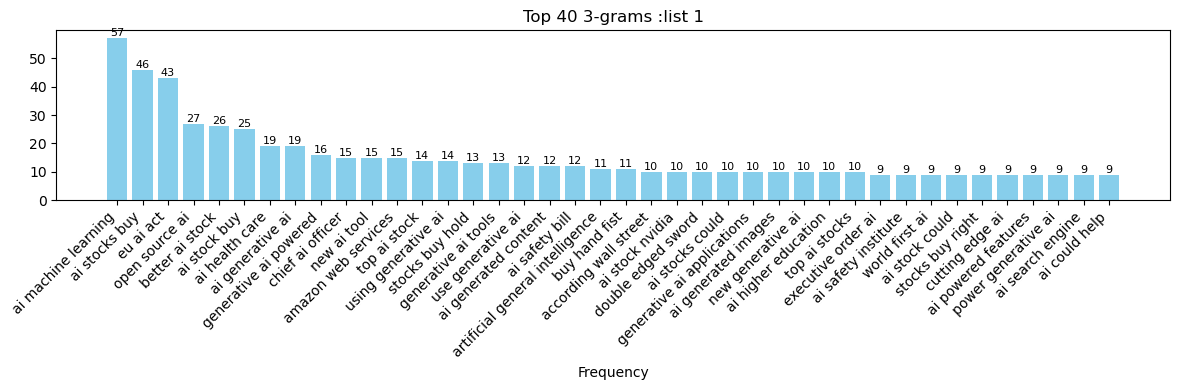

In [340]:
generate_bar_graphs1(df,'title4',3,40,1)

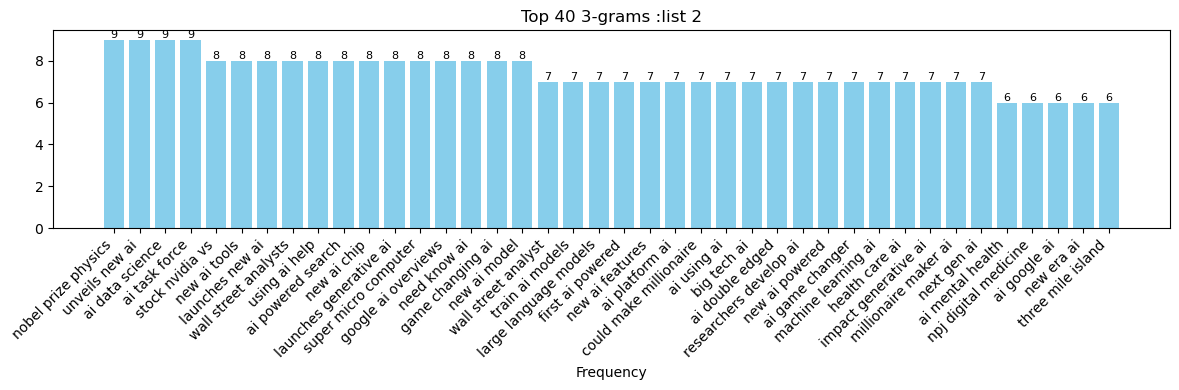

In [341]:
generate_bar_graphs1(df,'title4',3,40,2)

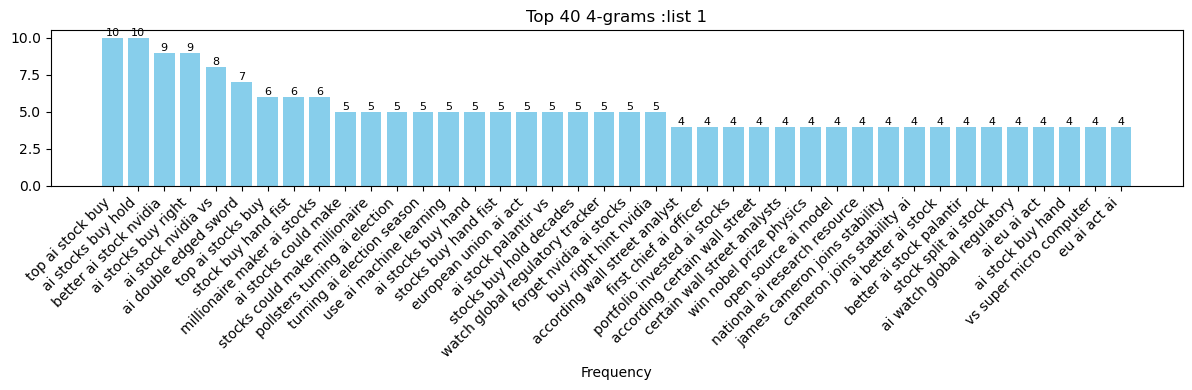

In [342]:
generate_bar_graphs1(df,'title4',4,40,1)

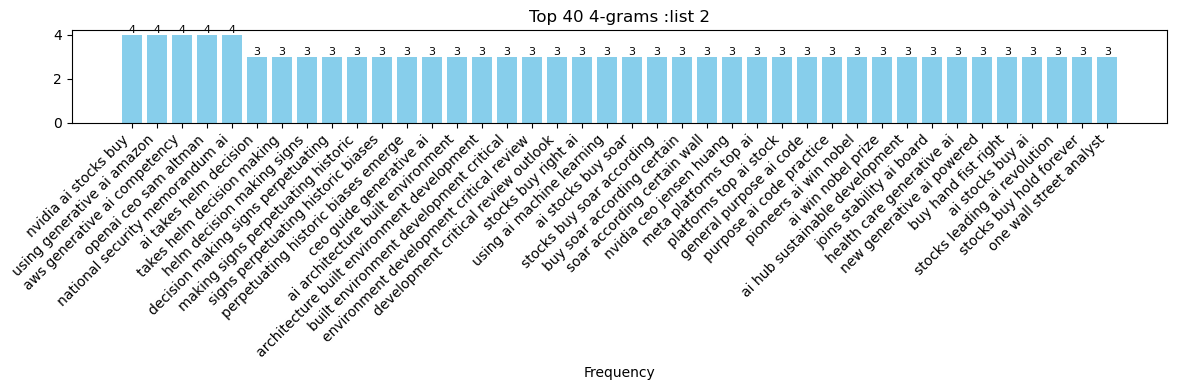

In [343]:
generate_bar_graphs1(df,'title4',4,40,2)

In [13]:
def generate_bar_graphs(df, category, title, n=2, top_k=20 ,n1=1):
    df_filtered = df[df['category'] == category]
    #text = ' '.join(df_filtered[title].astype(str).tolist())
    tokens = ' '.join(df_filtered[title].tolist())
    tokens = re.sub(r'(ai\s+)+', 'ai ', tokens)
    tokens = tokens.split()
    # Generate n-grams
    ng= list(ngrams(tokens, n))
    # Join n-grams into single strings
    text_ng = [' '.join(gram) for gram in ng]
    # Count frequency of each n-gram
    ng_count = Counter(text_ng)
    # Select top-k most common n-grams
    n2= top_k*(n1-1) # start index
    k = top_k*n1 # end index
    ng_common = ng_count.most_common(k)
    ng_common = ng_common[n2:k]
    plt.figure(figsize=(12, 4))
    bars = plt.bar(
        [item[0] for item in ng_common],  # x-axis: n-grams
        [item[1] for item in ng_common],  # y-axis: counts
        color='skyblue')
    #plt.bar([item[0] for item in ng_common], [item[1] for item in ng_common], color='skyblue')
    # Add count values on top of each bar (value on the y-axis)
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar (frequency)
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position of the text (center of the bar)
            height,                             # Y position of the text (top of the bar)
            f'{int(height)}',                   # Text to display (convert to integer)
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8                         # Font size of the text
        )
    plt.xlabel('Frequency')
    plt.title(f'Top {top_k} {n}-grams in {category} : list{n1}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Career category

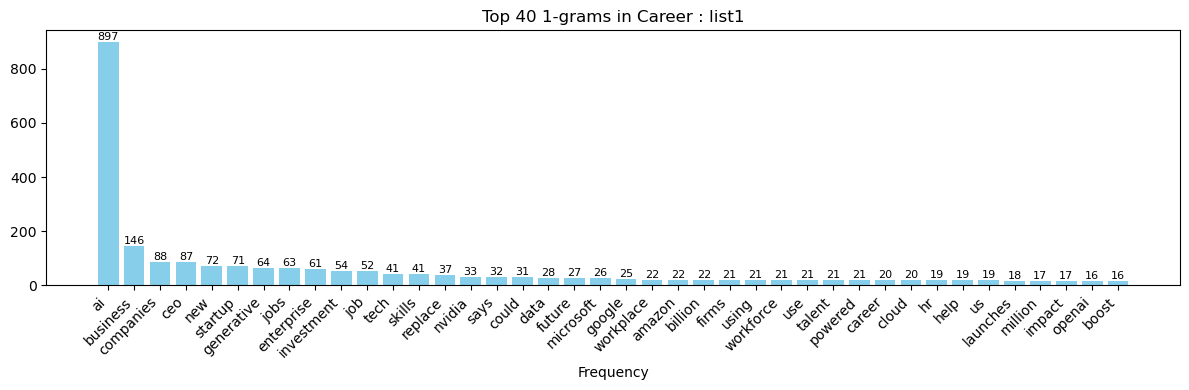

In [14]:
generate_bar_graphs(df,'Career','title4',1,40,1)

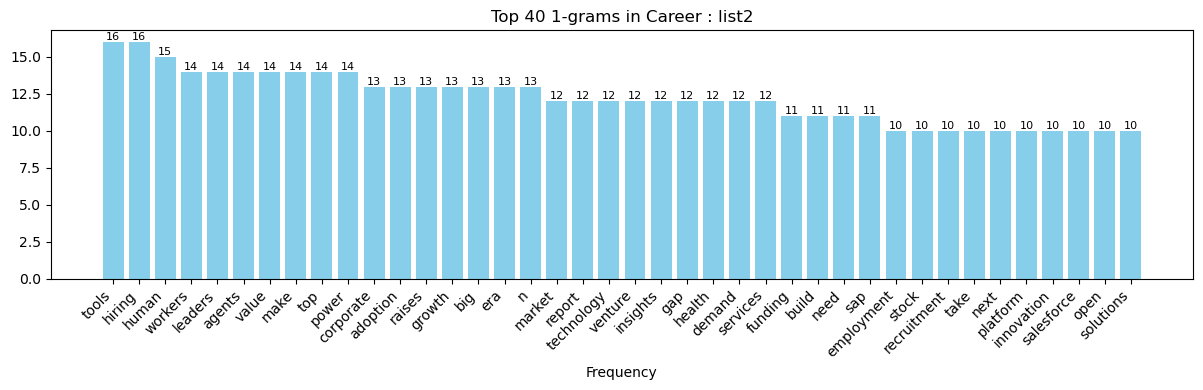

In [15]:
generate_bar_graphs(df,'Career','title4',1,40,2)

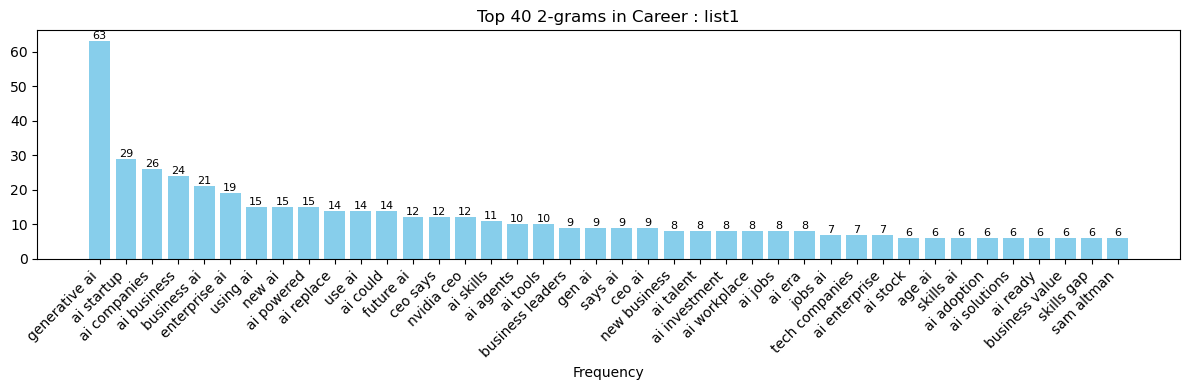

In [16]:
generate_bar_graphs(df,'Career','title4',2,40,1)

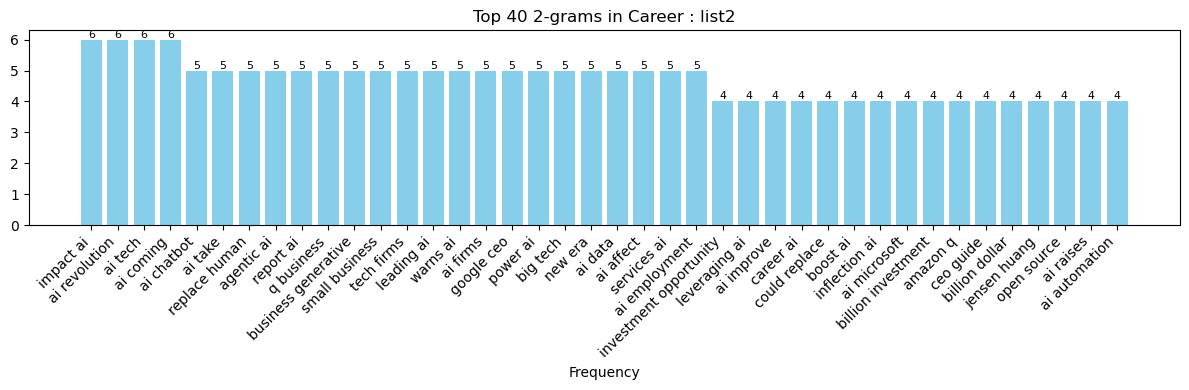

In [17]:
generate_bar_graphs(df,'Career','title4',2,40,2)

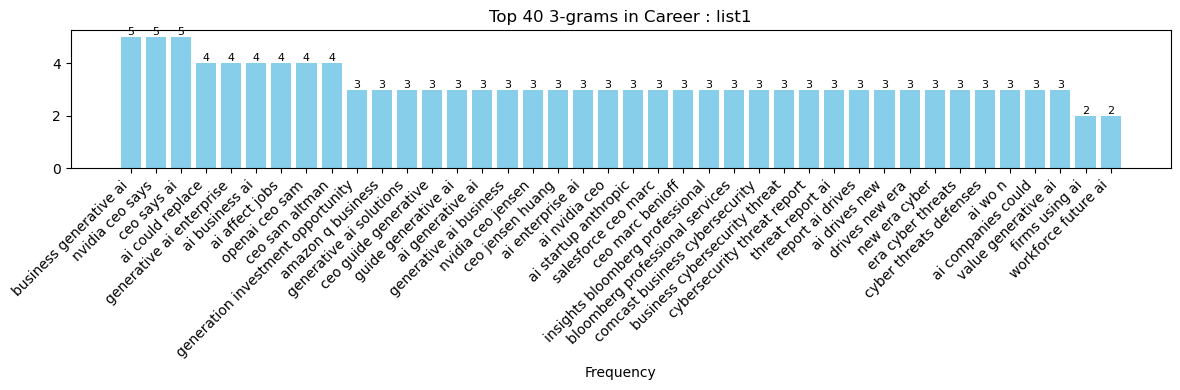

In [18]:
generate_bar_graphs(df,'Career','title4',3,40,1)

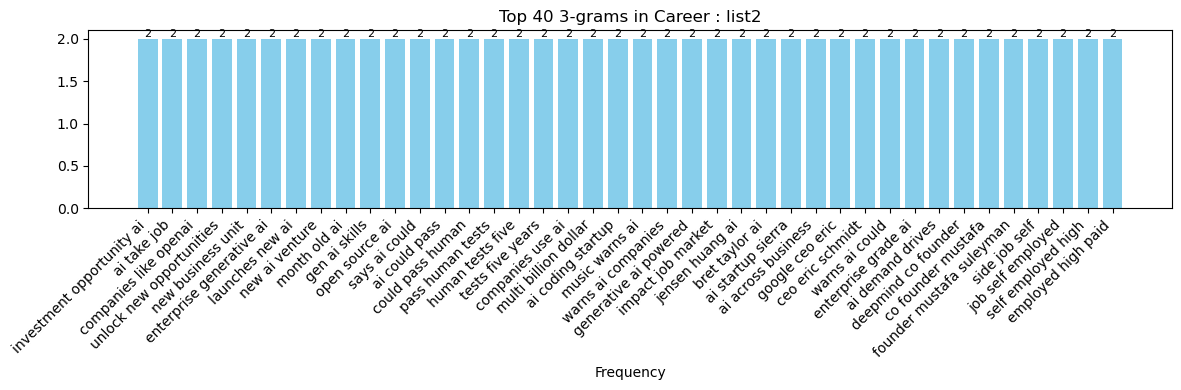

In [19]:
generate_bar_graphs(df,'Career','title4',3,40,2)

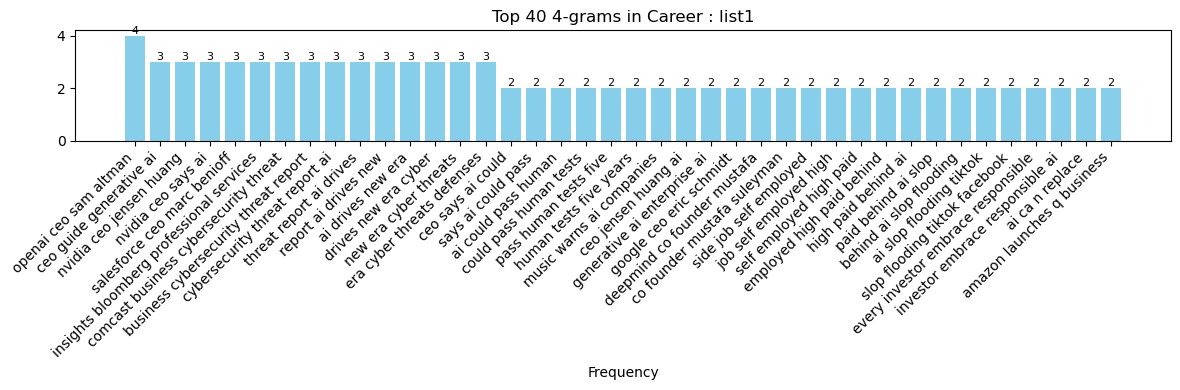

In [20]:
generate_bar_graphs(df,'Career','title4',4,40,1)

### Education category

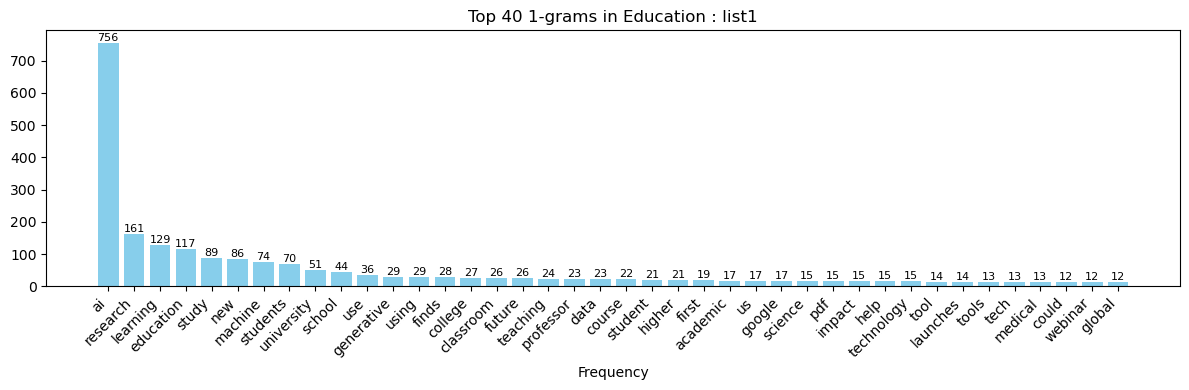

In [21]:
generate_bar_graphs(df,'Education','title4',1,40,1)

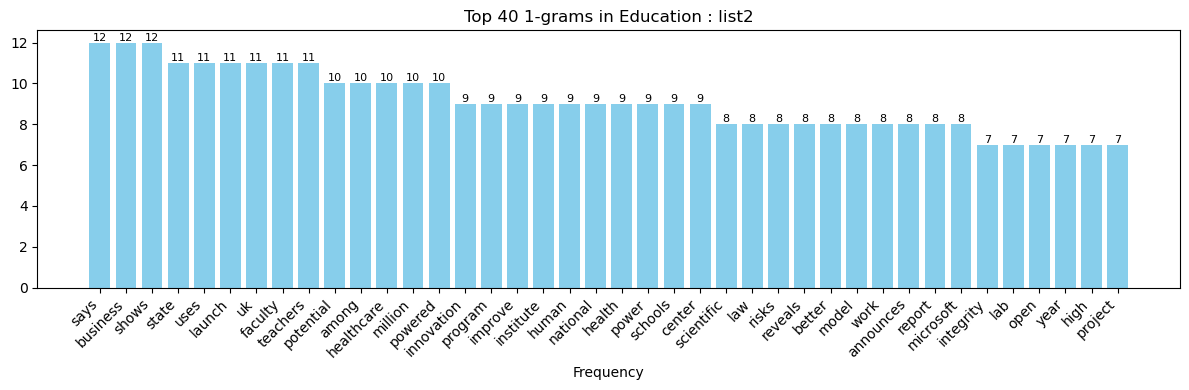

In [22]:
generate_bar_graphs(df,'Education','title4',1,40,2)

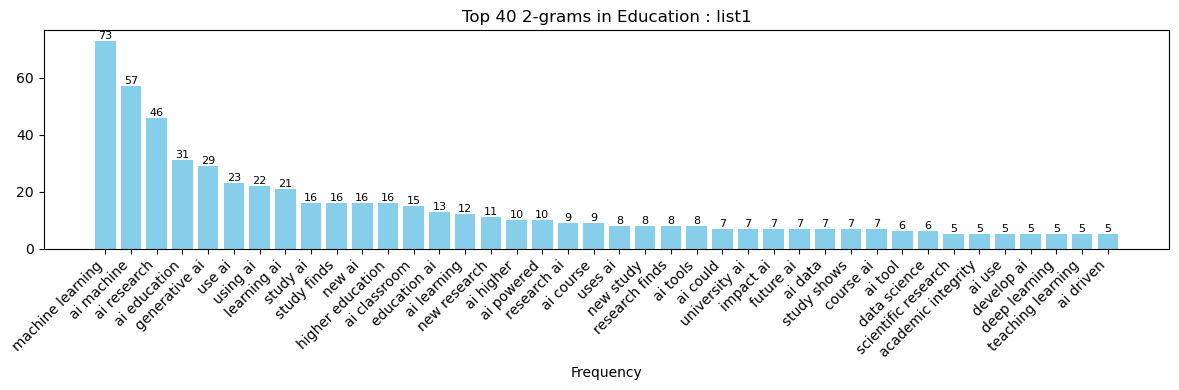

In [23]:
generate_bar_graphs(df,'Education','title4',2,40,1)

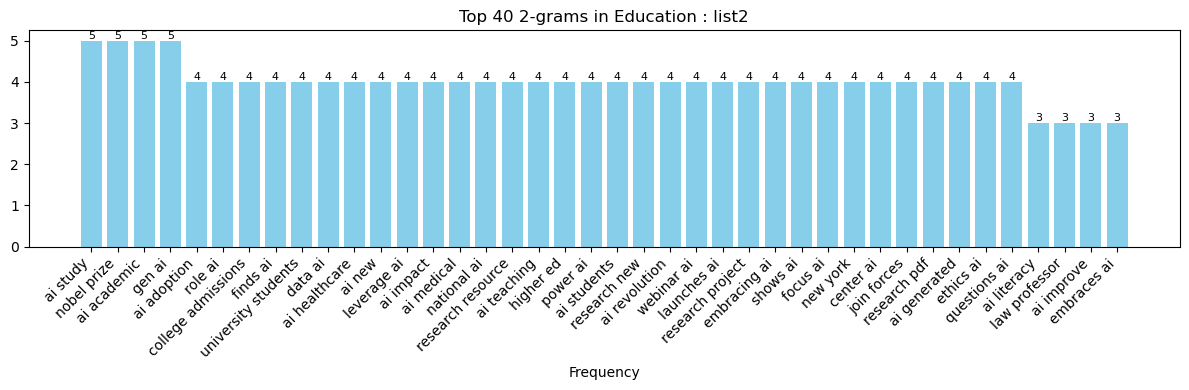

In [24]:
generate_bar_graphs(df,'Education','title4',2,40,2)

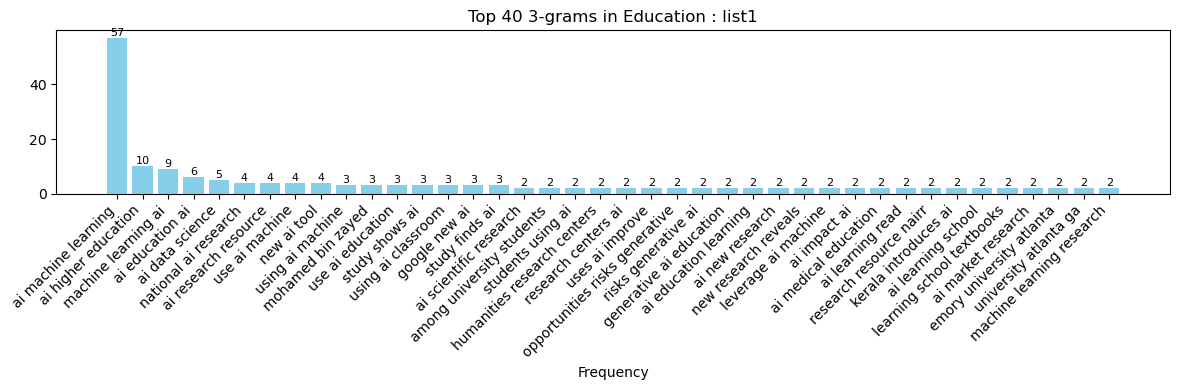

In [25]:
generate_bar_graphs(df,'Education','title4',3,40,1)

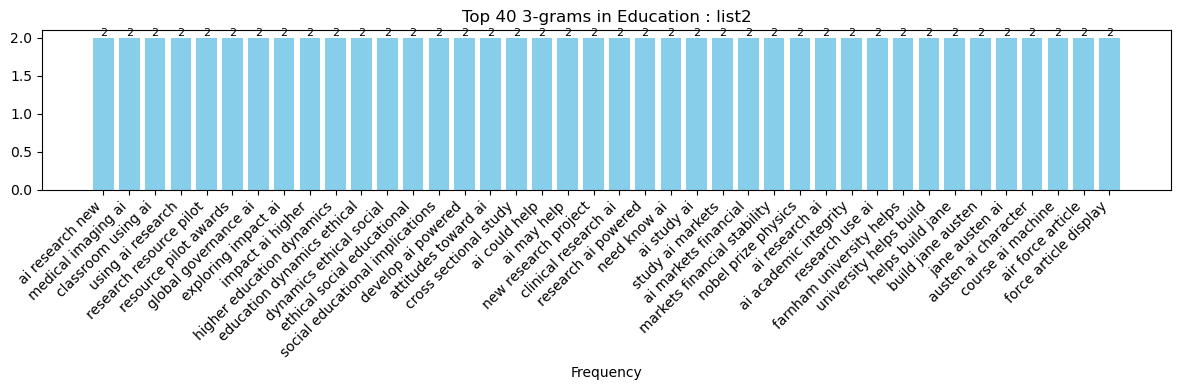

In [361]:
generate_bar_graphs(df,'Education','title4',3,40,2)

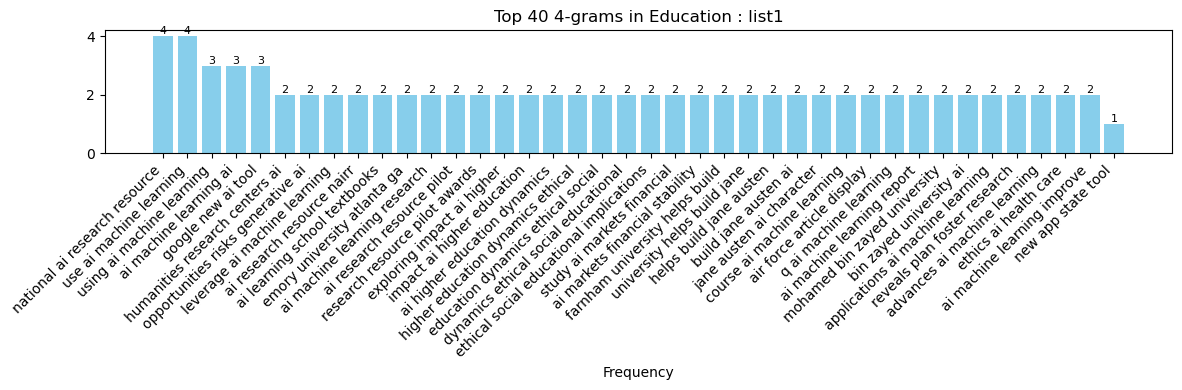

In [362]:
generate_bar_graphs(df,'Education','title4',4,40,1)

### Society category

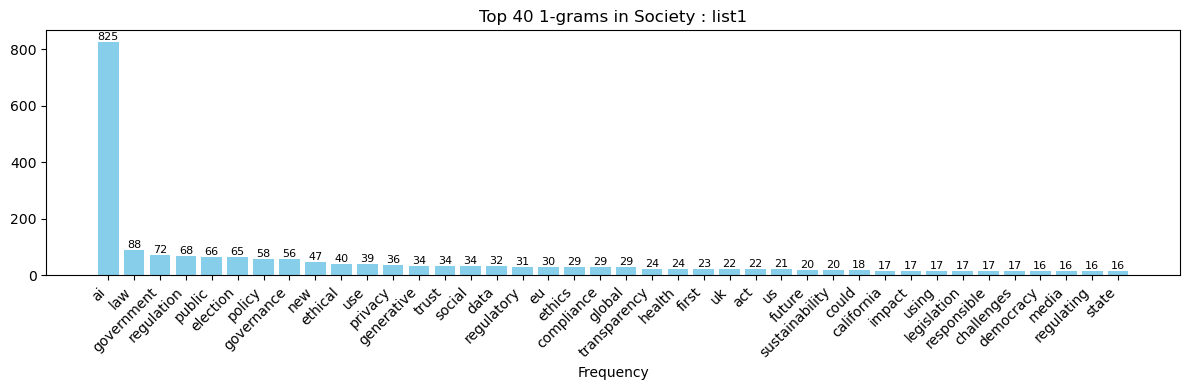

In [363]:
generate_bar_graphs(df,'Society','title4',1,40,1)

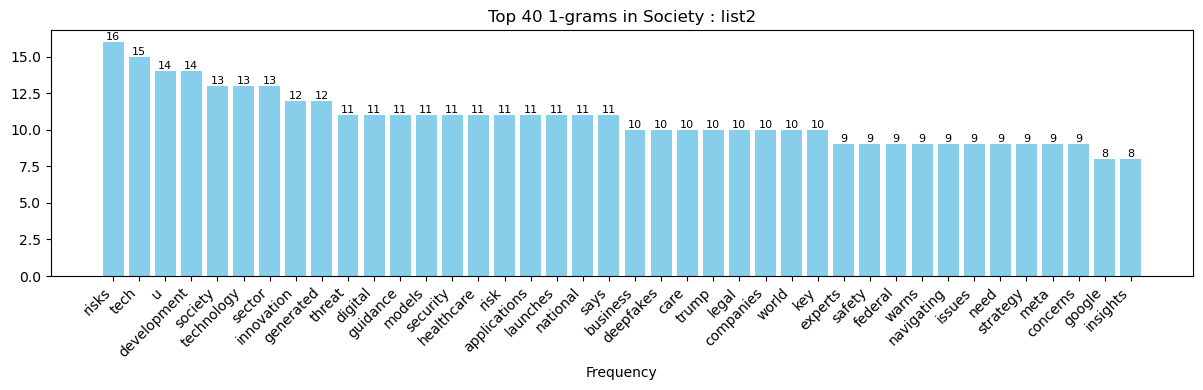

In [364]:
generate_bar_graphs(df,'Society','title4',1,40,2)

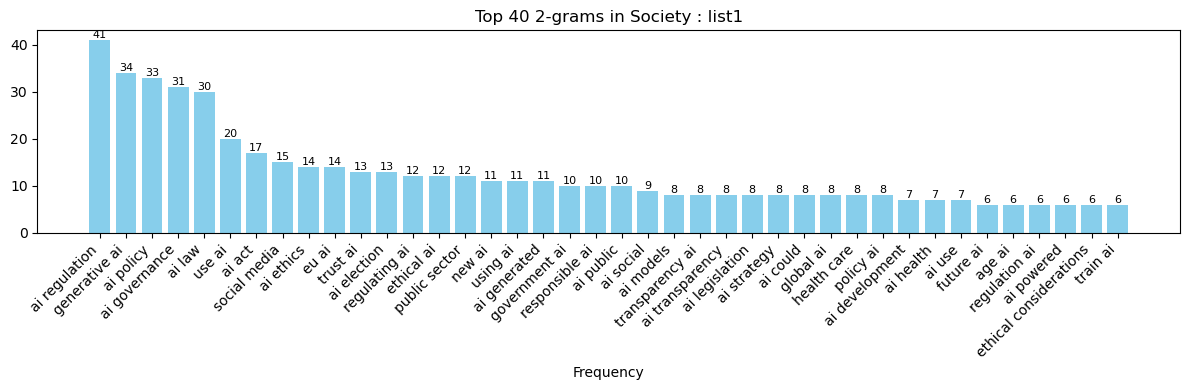

In [365]:
generate_bar_graphs(df,'Society','title4',2,40,1)

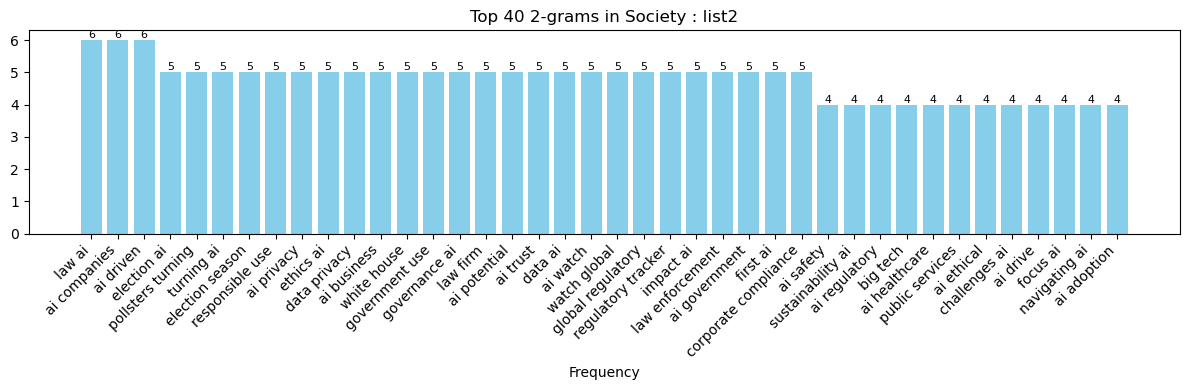

In [366]:
generate_bar_graphs(df,'Society','title4',2,40,2)

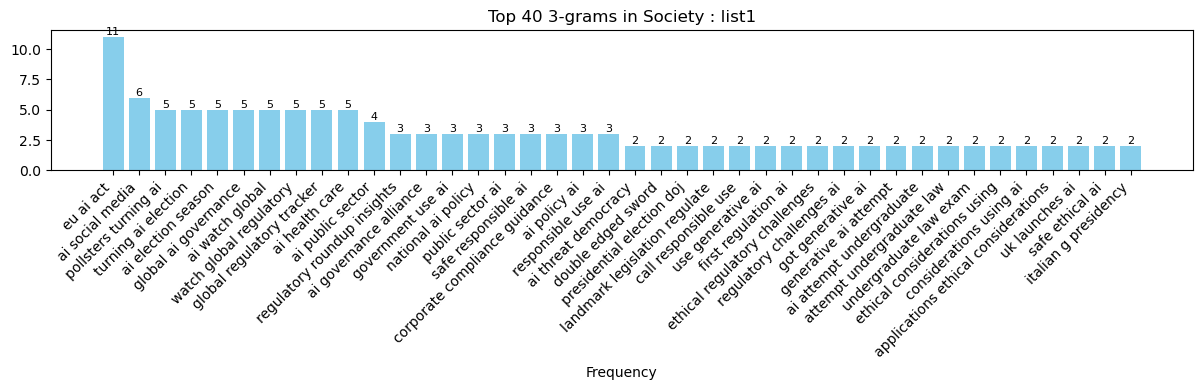

In [367]:
generate_bar_graphs(df,'Society','title4',3,40,1)

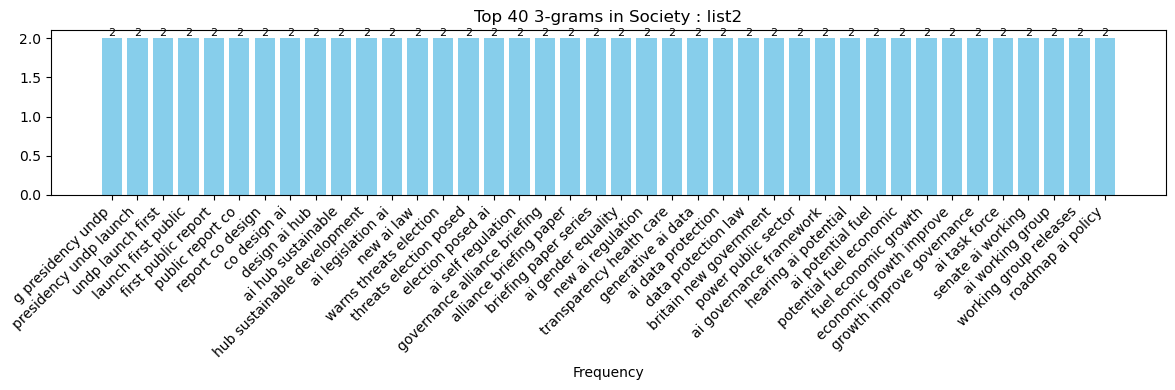

In [370]:
generate_bar_graphs(df,'Society','title4',3,40,2)

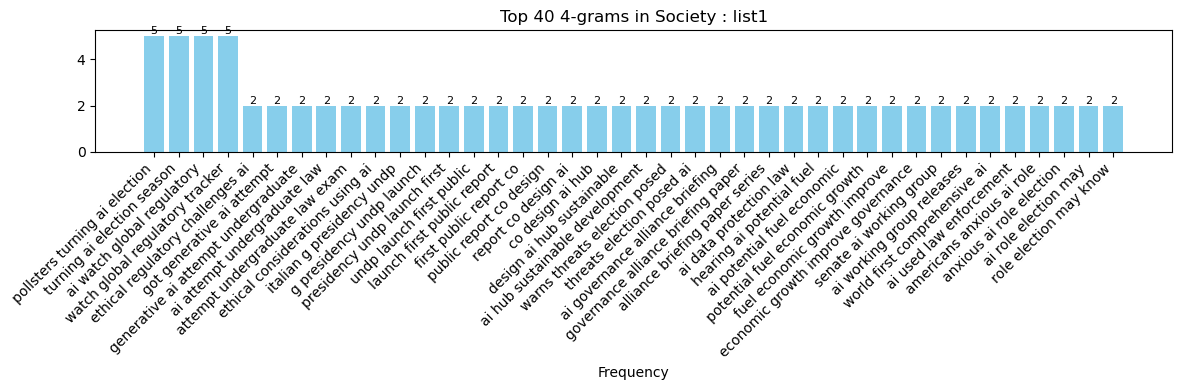

In [371]:
generate_bar_graphs(df,'Society','title4',4,40,1)

### Other category

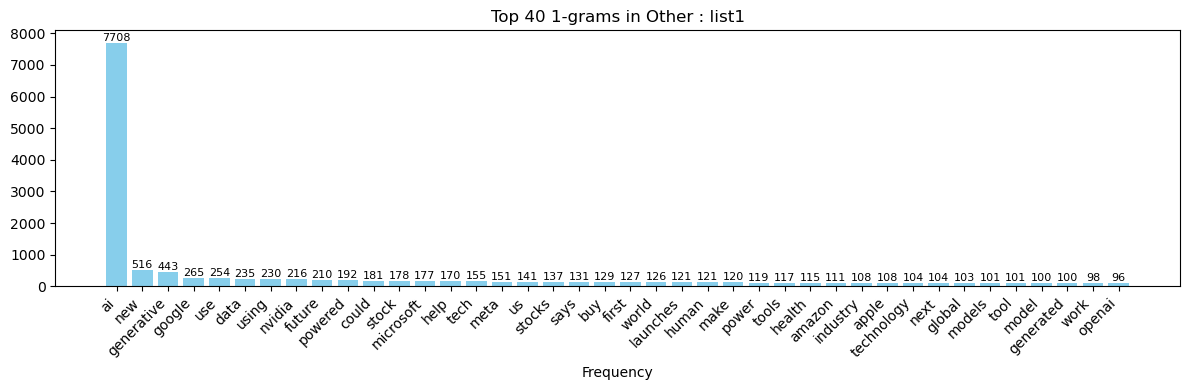

In [372]:
generate_bar_graphs(df,'Other','title4',1,40,1)

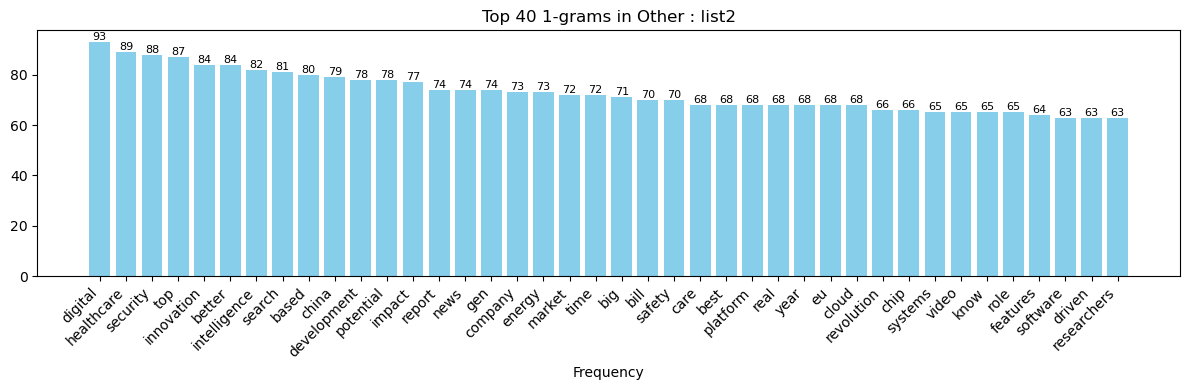

In [373]:
generate_bar_graphs(df,'Other','title4',1,40,2)

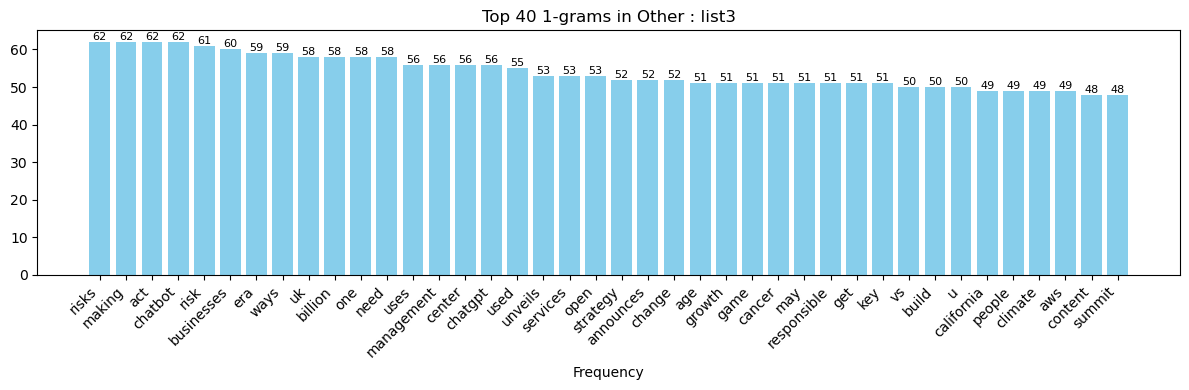

In [374]:
generate_bar_graphs(df,'Other','title4',1,40,3)

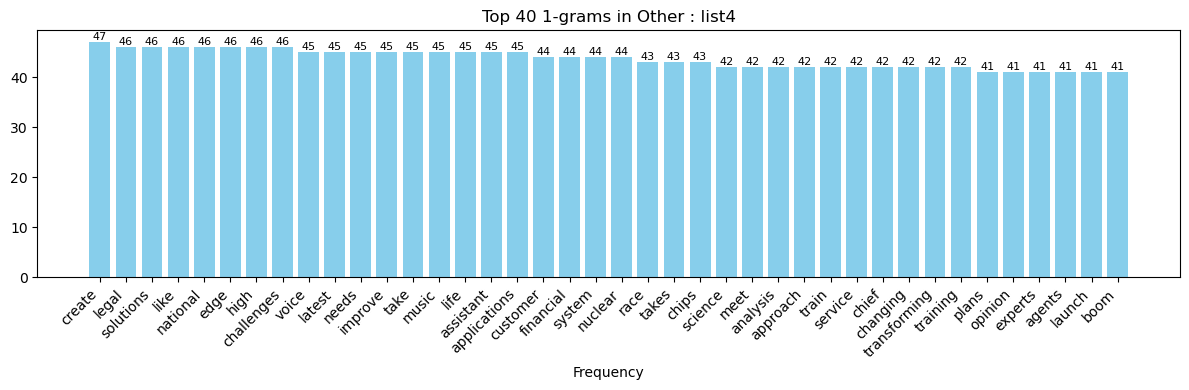

In [375]:
generate_bar_graphs(df,'Other','title4',1,40,4)

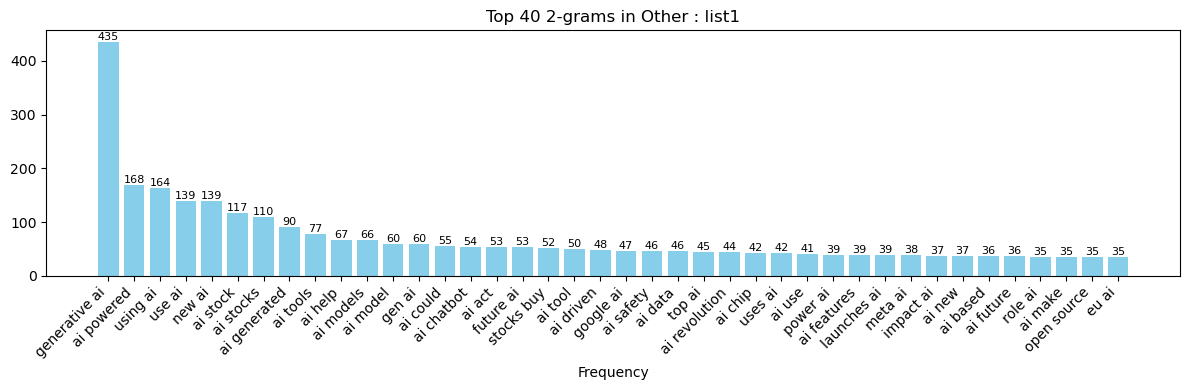

In [376]:
generate_bar_graphs(df,'Other','title4',2,40,1)

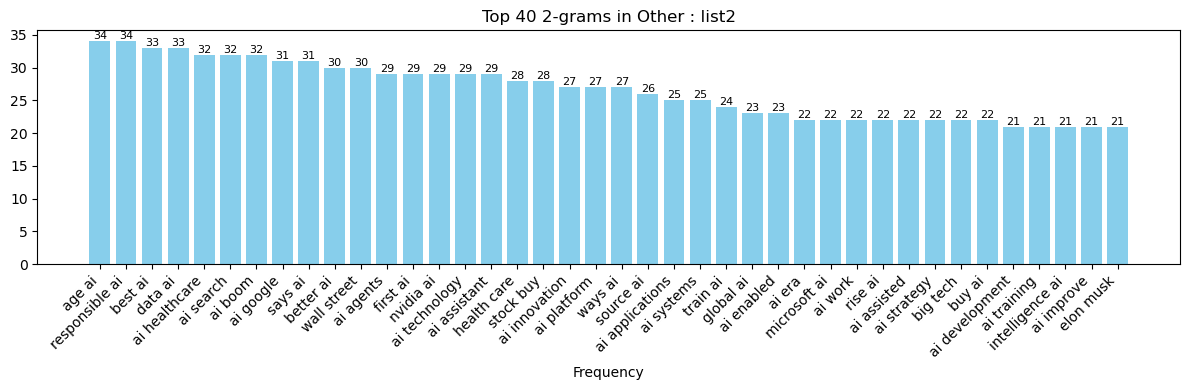

In [377]:
generate_bar_graphs(df,'Other','title4',2,40,2)

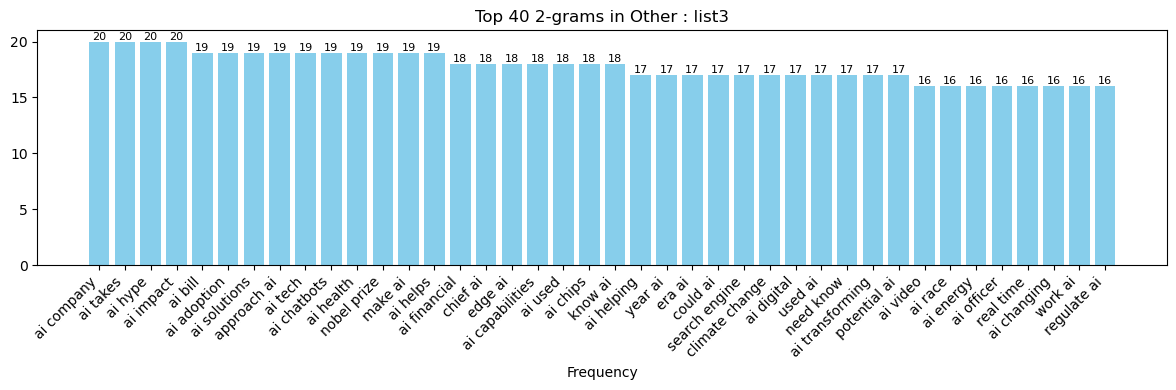

In [378]:
generate_bar_graphs(df,'Other','title4',2,40,3)

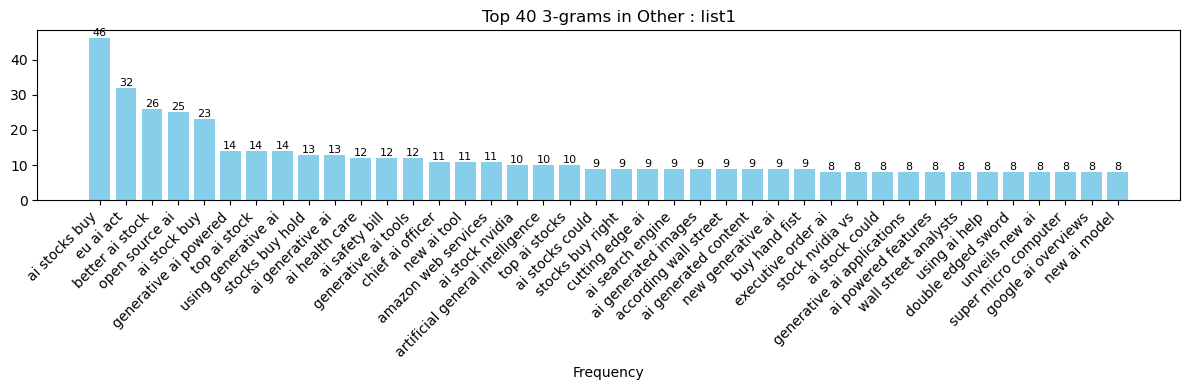

In [379]:
generate_bar_graphs(df,'Other','title4',3,40,1)

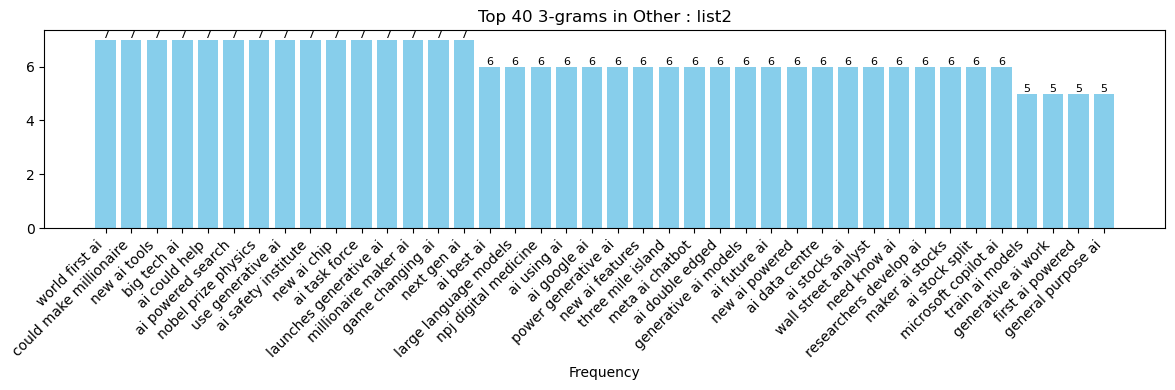

In [380]:
generate_bar_graphs(df,'Other','title4',3,40,2)

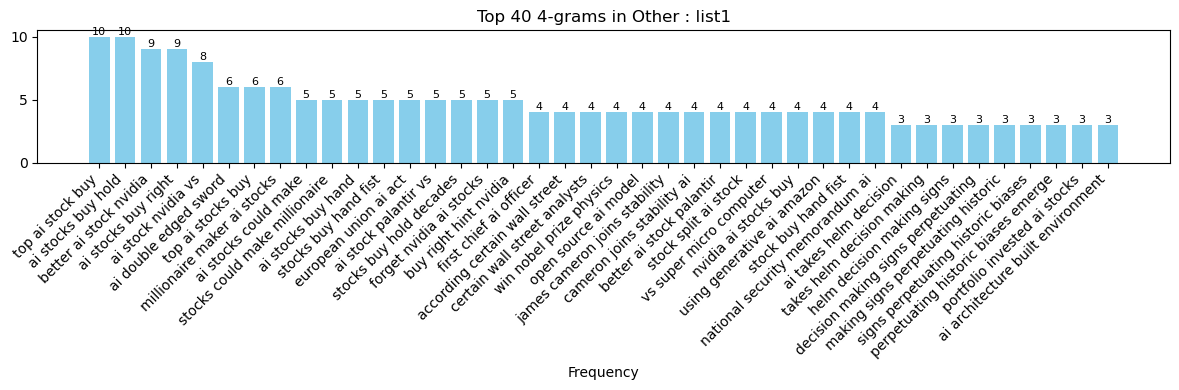

In [381]:
generate_bar_graphs(df,'Other','title4',4,40,1)

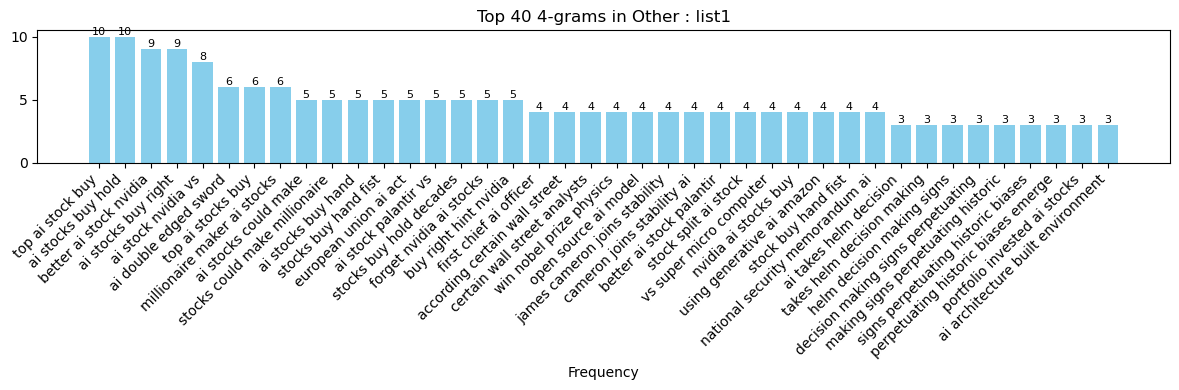

In [382]:
generate_bar_graphs(df,'Other','title4',4,40)

Text(0.5, 1.0, 'Word Cloud for title')

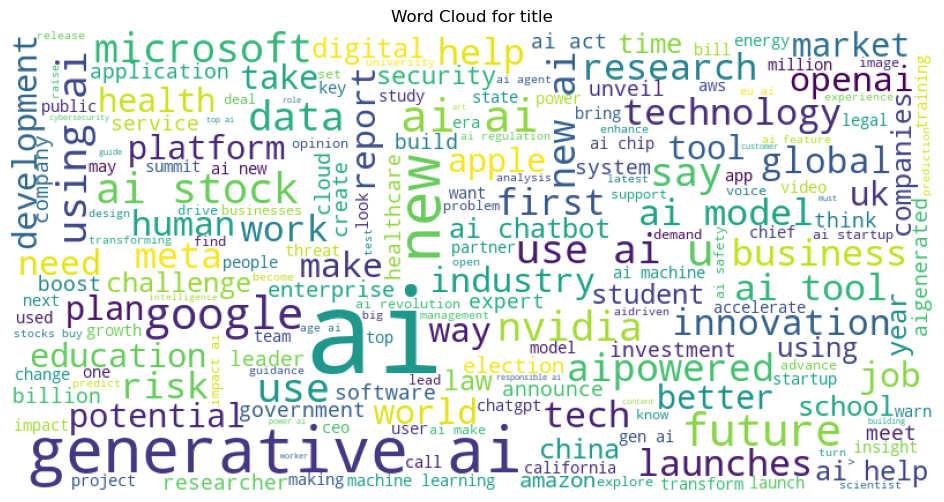

In [245]:
title_text = ' '.join(df['title4'].tolist())
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Word Cloud for title')